# Making models with Bagpipes

Let's import bagipes:

In [1]:
import bagpipes as pipes
import numpy as np


ERROR:   Could not load MultiNest library "libmultinest.so"
ERROR:   You have to build it first,
ERROR:   and point the LD_LIBRARY_PATH environment variable to it!
ERROR:   manual: http://johannesbuchner.github.com/PyMultiNest/install.html


ERROR:   Could not load MultiNest library: libmultinest.so
ERROR:   You have to build MultiNest,
ERROR:   and point the LD_LIBRARY_PATH environment variable to it!
ERROR:   manual: http://johannesbuchner.github.com/PyMultiNest/install.html

problem: libmultinest.so: cannot open shared object file: No such file or directory
Bagpipes: PyMultiNest import failed, fitting will be unavailable.


## Creating a model galaxy

In [2]:
# The star-formation history:

exp = {}                          
exp["age"] = 6.                   # Age in Gyr
exp["tau"] = 1.                   # Rate at which SFR decreases
exp["massformed"] = 9.            # Mass, log_10(M*/M_solar)
exp["metallicity"] = 0.5          # Metallicity, Z/Z_oldsolar

#Dust:

dust = {}                         
dust["type"] = "Calzetti"         # Define the shape of the attenuation curve
dust["Av"] = 0.2                  # V-band attenuation


# Compiling the parameters in the model_components dictionary:

model_components = {}                   
model_components["redshift"] = 0.0      # Observed redshift  
model_components["exponential"] = exp   # The star-formation history dictionary
model_components["dust"] = dust         # The dust component

# Wavelength array to plot spectra.
wl = np.arange(1000, 10000, 1)

# Creating a model galaxy
model = pipes.model_galaxy(model_components, spec_wavs=wl)

### Let's see what we have done

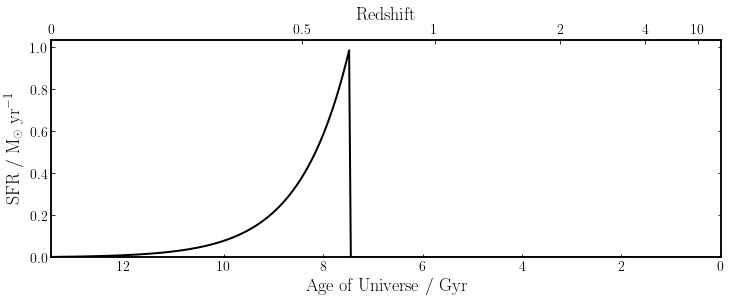

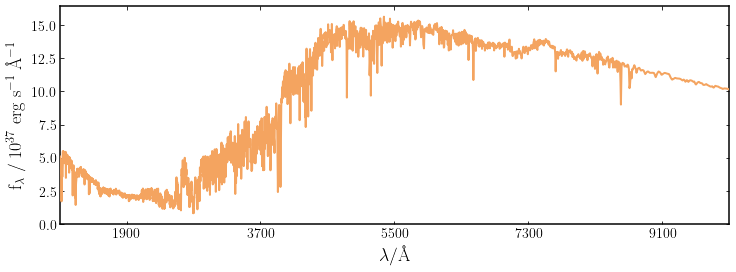

In [3]:
fig = model.sfh.plot()
fig = model.plot()

# Adding nebular component

Will add emission lines to the spectra, equivalent to adding gas to the galaxy.

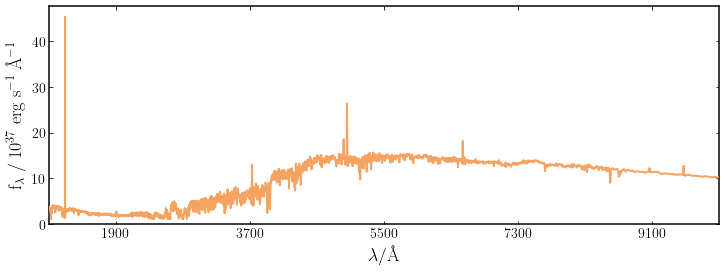

In [4]:
# Add a nebular component

nebular = {}                      
nebular["logU"] = -2            # log_10(ionization parameter)

# The young stars that are ionizing the gas are also more attenuated by dust

dust["eta"] = 2.                        # Extra dust for young stars: multiplies Av
model_components["t_bc"] = 0.01         # Lifetime of birth clouds (Gyr)

model_components["nebular"] = nebular

model = pipes.model_galaxy(model_components, spec_wavs=wl)

fig = model.plot()

### Let's plot the entire model

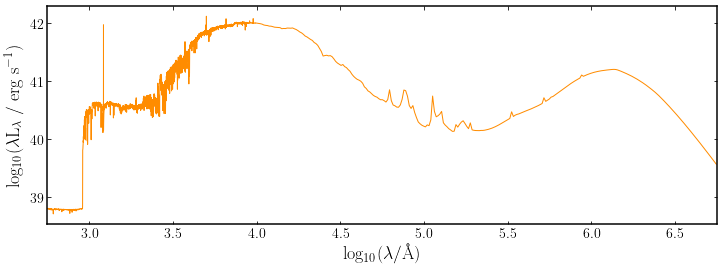

In [5]:
model.plot_full_spectrum()

# Playing with S-PLUS data

First, lets load our data and select only bright galaxies.

In [6]:
from astropy.table import Table

catalog = Table.read('splus_laplata.txt', format='ascii')

# Select only galaxies with no missing bands and r magnitude < 17
catalog = catalog[(catalog['nDet_auto'] == 12) & (catalog['r_auto'] < 17) & (catalog['class_2'] == 'GALAXY')]

The file black_box.py contains "hidden functions" that we will use in this example.

The function plot_model_and_observation will plot the S-PLUS fluxes of a galaxy in our sample along with a model generated by bagpipes. 

Let's import the function.

In [7]:
from black_box import plot_model_and_observation

For example, here we are plotting photometry from galaxy 869 in our sample with a bagpipes model:

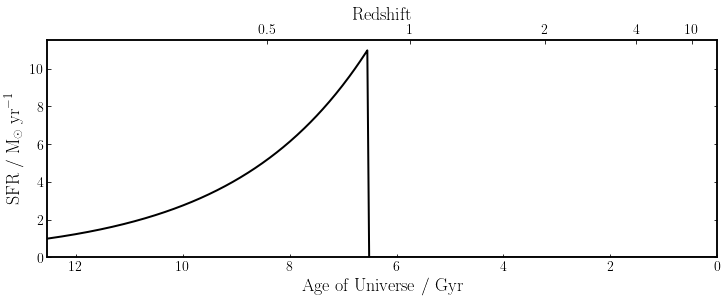

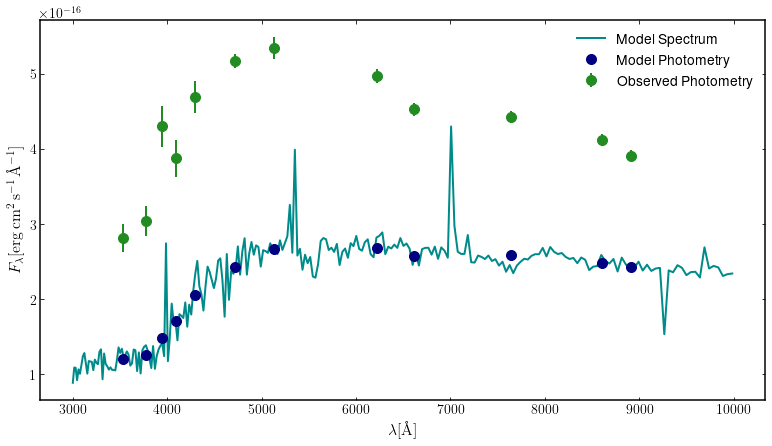

In [9]:
plot_model_and_observation(galaxy_table=catalog, galaxy_index=869, age=6, tau=2.5, mass=10.4
                           , metallicity=1, Av=0.6)

## Let's see if you can find a good model for galaxies 46 and 818!

### Galaxy 46:
RA = 53.5671, Dec = -1.1914

<img src="files/46.png">

### Galaxy 818:
RA = 37.9299, Dec = 0.9044

<img src="files/818.png">